# Handwriting recognition (Based of [Tensorflow and deep learning - without a PhD by Martin Görner](https://www.youtube.com/watch?v=vq2nnJ4g6N0))

After finishing the linear regression problem, we are going to move to handwriting recognition. This is always the hard task for us to program because we can't define all the rules for computer to recognise the digits. So, now the age of deep neural network has came, we can use them to recognise the digits.

## MNIST

We are going to use MNIST dataset. We have already see it in section 1. 

## Lets look at the picture itself. 

Pictures are composted of pixels of colors. We, then, can represent the picture as a 3D - matrix. In the theory of colors, all of them are the mixture of 3 primary colors Red, Green, Blue. We can represent them in the value of all 3 of all colors.

### Why 3d?

There are 3 dimesions for the images the first one is width. The second on is height. The last one is the color in RGB value. But since, the MNIST is black and white, the color values will be how dark the color is.

## Looking at the network architecture.

We are going to have 3 hidden layers. 
- The input will be the list of darkness values in the MNIST dataset. In total, we will have 28*28 or 784 input neurons, with sigmoid function as activation function.
- The input layer will have 100 neurons.
- The first hidden layer will have 50 neurons, with sigmoid function as activation function.
- The second hidden layer will have 25 neurons, with sigmoid function as activation function.
- The third hidden layer will have 13 neurons, with sigmoid function as activation function.
- The output layer will have 10 neurons that will output the probability of being each class (0-9), so we will need <i> Softmax </i>

We are also going to use Cross entropy as a cost function.

## What is softmax? 

Let's look at the function. 

$$ Softmax(x)_z = \frac {e^{z_j}}{\sum_{k = 1}^{K} e^{z_k}} $$

It will returns a matrix of probabilities. So for our MNIST dataset, the class that have the highest probability will be the correct class. The probability itself can be used as confidence level.

## Training and Testing.

We will use the training set as a training set. And, We will use the testing set as a testing set. This may sound weird, but I got the explaination for you. 

Imagine we are in the classroom where kids start to learn how to add and minus. In the class we gives them examples, such as, 1+1 = 2, 2+2 = 4 and so on. Although kids are performing well in class, they will perform very bad in the exam because what they do is just memorize the answer in the classroom. In machine learning, we call this case "Overfitting". That why we have to seperate the testing and training set, in order to figure it out whether our neural just only be good because it familiar with the traing set. 

In [146]:
# Load the libaries 

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import math
%matplotlib inline  

# Load the datasets
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## One-hot encoding

It is the way we can get the label by having to probability to be one (absolutely correct).

Lets look at it.

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


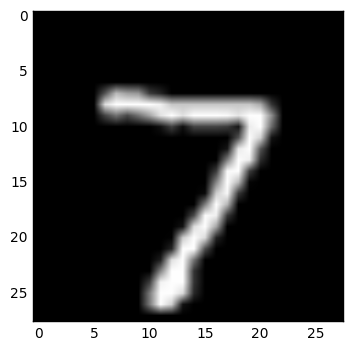

In [147]:
# Get the label of the first testing set
print(mnist.test.labels[0])

# Looking at the data itself.
# The way to visualize the image

img = mnist.test.images[0]

# Using pyplot to show the image in greyscale
plt.imshow(img.reshape((28,28)), cmap='gray')

In [148]:
# Create placeholder for image
# None because we still don't know how many images we are going to feed,
img_x = tf.placeholder(tf.float32, [None, 28, 28, 1])

# Create placeholder for correct label
correct_label = tf.placeholder(tf.float32, [None, 10])

# Our input layer
W1 = tf.Variable(tf.truncated_normal([784,100], stddev=0.1)) 
B1 = tf.Variable(tf.zeros([100]))

# Our first hidden layer
W2 = tf.Variable(tf.truncated_normal([100, 50], stddev=0.1))
B2 = tf.Variable(tf.zeros([50]))

# Our second hidden layer
W3 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.1))
B3 = tf.Variable(tf.zeros([25]))

# Our third hidden layer
W4 = tf.Variable(tf.truncated_normal([25, 13], stddev=0.1))
B4 = tf.Variable(tf.zeros([13]))

# Our output layer 
W5 = tf.Variable(tf.truncated_normal([13, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
# Modify the input
XX = tf.reshape(img_x, [-1, 784])

### Why storing weight in matrix? 

Let's look this simple neural network

<img src="img/Section6img/NN_new.jpeg">

We will call the weight between neuron 1 and 3 $ W_13 $.

For example the input matrix,

\begin{bmatrix} i_{11} & i_{12}  \\ i_{21} & i_{22}  \\ i_{31} & i_{32}  \\ \end{bmatrix} 

The weight matrix 

\begin{bmatrix} W_{13} & W_{14} & W_{15}  \\ W_{23} & W_{24} & W_{25}  \\ \end{bmatrix} 

When we multiply the matrixes. (input * weight)

\begin{bmatrix} 
i_{11} * W_{13} + i_{12} *W_{23} &  i_{11} * W_{14} + i_{12} *W_{24} & i_{11} * W_{15} + i_{12} *W_{25}\\ i_{21} * W_{13} + i_{22} *W_{23} &  i_{21} * W_{14} + i_{22} *W_{24} & i_{21} * W_{15} + i_{22} *W_{25}\\ i_{31} * W_{13} + i_{32} *W_{23} &  i_{31} * W_{14} + i_{32} *W_{24} & i_{31} * W_{15} + i_{32} *W_{25}\\ \end{bmatrix} 

Which is the input of the next layer.

Having matrix make tings much easiler.

In [149]:
# Output of input layer
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)

# Output of hidden layer 1
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

# Output of hidden layer 2
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)

# Ourput of hidden layer 3
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)

# Final layer 
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [150]:
# Then we define the loss function

diff = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=correct_label)
cross_entropy = tf.reduce_mean(diff)*100

# Using another type of optimizer.
train_step = tf.train.AdamOptimizer(0.003).minimize(cross_entropy)

Cost training:  229.66
Cost training:  148.115
Cost training:  96.4324
Cost training:  61.4221
Cost training:  78.9772
Cost training:  34.1581
Cost training:  29.6337
Cost training:  50.1405
Cost training:  31.6031
Cost training:  51.7417


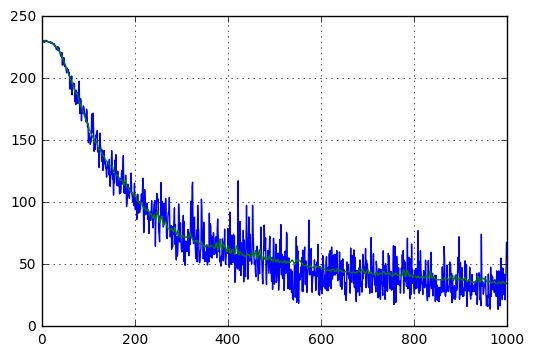

In [151]:
# Initialize everything.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

recorder_cost_traindata = []
recorder_cost_testdata = []

for i in range(1000):
    # We are going to feed the train image 100 at a time.
    batch_X_train, batch_Y_train = mnist.train.next_batch(100)
    
    
    train_data = {img_x: batch_X_train, correct_label: batch_Y_train}
    test_data = {img_x: mnist.test.images, correct_label: mnist.test.labels}
    
    # Train the data
    sess.run(train_step, feed_dict=train_data)
    
    # Get the cost for both
    c = sess.run(cross_entropy, feed_dict=train_data)
    c_test = sess.run(cross_entropy, feed_dict=test_data)
    
    # Pring every 100 times
    if i%100 == 0:
        print("Cost training: ", c)
        
    # record the cost
    recorder_cost_traindata.append(c)
    recorder_cost_testdata.append(c_test)

# Print out the recorder
plt.plot(recorder_cost_traindata)
plt.plot(recorder_cost_testdata)
plt.grid()
plt.show()

sess.close()

### Can we improve this?

1. There is a lot of noices in the training. And, sometimes the cost is already low, but the program makes it goes up. 
2. Overfitting.

### Solution

1. Since there is a lot of noices, that means the learning rate is moving too fast. But, we don't want the learning to be slow. This may sounds like a dilemma, but there is solution. The solution is to have weight decay. First we start quickly, then we will slow the learning rate down. 

Cost training:  229.325
Cost training:  163.002
Cost training:  90.7508
Cost training:  68.1168
Cost training:  46.3039
Cost training:  49.7056
Cost training:  28.5231
Cost training:  29.8643
Cost training:  33.2667
Cost training:  25.2182


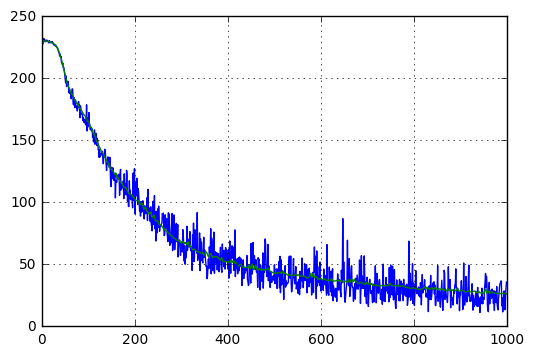

In [152]:
# Learning rate
learning_rate = tf.placeholder(tf.float32)

# Change the train function
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

recorder_cost_traindata = []
recorder_cost_testdata = []

for i in range(1000):
    # We are going to feed the train image 100 at a time.
    batch_X_train, batch_Y_train = mnist.train.next_batch(100)
    
    # Make the learning rate decay exponentially 
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate_d = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
    
    # Have to add the learning rate becuase the variable in the test function is a placeholder
    train_data = {img_x: batch_X_train, correct_label: batch_Y_train, learning_rate: learning_rate_d}
    test_data = {img_x: mnist.test.images, correct_label: mnist.test.labels, learning_rate: learning_rate_d}
    
    # Train the data
    sess.run(train_step, feed_dict=train_data)
    
    # Get the cost for both
    c = sess.run(cross_entropy, feed_dict=train_data)
    c_test = sess.run(cross_entropy, feed_dict=test_data)
    
    # Pring every 100 times
    if i%100 == 0:
        print("Cost training: ", c)
        
    # record the cost
    recorder_cost_traindata.append(c)
    recorder_cost_testdata.append(c_test)

# Print out the recorder
plt.plot(recorder_cost_traindata)
plt.plot(recorder_cost_testdata)
plt.grid()
plt.show()

sess.close()

There is one way we can get rid of overfitting called drop out.

What it does is to disable the neuron with probability, rolling the dice.

In [153]:
pkeep = tf.placeholder(tf.float32)
# Output of input layer
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

# Output of hidden layer 1
Y2 = tf.nn.sigmoid(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

# Output of hidden layer 2
Y3 = tf.nn.sigmoid(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

# Ourput of hidden layer 3
Y4 = tf.nn.sigmoid(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

# Final layer 
Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=correct_label)
cross_entropy = tf.reduce_mean(cross_entropy)*100

train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(correct_label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Cost training:  228.989
Acuracy training:  0.14
Cost training:  202.77
Acuracy training:  0.16
Cost training:  168.499
Acuracy training:  0.37
Cost training:  159.947
Acuracy training:  0.26
Cost training:  148.047
Acuracy training:  0.4
Cost training:  140.633
Acuracy training:  0.37
Cost training:  127.421
Acuracy training:  0.47
Cost training:  123.524
Acuracy training:  0.51
Cost training:  118.379
Acuracy training:  0.51
Cost training:  111.178
Acuracy training:  0.59


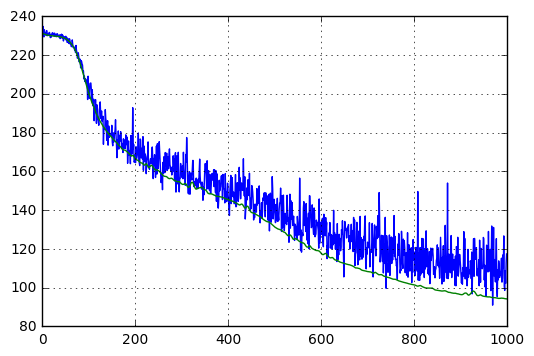

In [154]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

recorder_cost_traindata = []
recorder_cost_testdata = []

recorder_a_traindata = []
recorder_a_testdata = []

for i in range(1000):
    # We are going to feed the train image 100 at a time.
    batch_X_train, batch_Y_train = mnist.train.next_batch(100)
    
    # Make the learning rate decay exponentially 
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate_d = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
    
    # Have to add the learning rate becuase the variable in the test function is a placeholder
    train_data = {img_x: batch_X_train, correct_label: batch_Y_train, 
                  lr: learning_rate_d, pkeep:0.75}
    
    # No need to drop the neuron in testing
    test_data = {img_x: mnist.test.images, correct_label: mnist.test.labels, 
                 lr: learning_rate_d, pkeep:1}
    
    # Train the data
    sess.run(train_step, feed_dict=train_data)
    
    # Get the cost for both
    a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    # Pring every 100 times
    if i%100 == 0:
        print("Cost training: ", c)
        print("Acuracy training: ", a)
        
    # record the cost
    recorder_cost_traindata.append(c)
    recorder_cost_testdata.append(c_test)
    
    recorder_a_traindata.append(a)
    recorder_a_testdata.append(a_test)

# Print out the recorder
plt.plot(recorder_cost_traindata)
plt.plot(recorder_cost_testdata)
plt.grid()
plt.show()

sess.close()

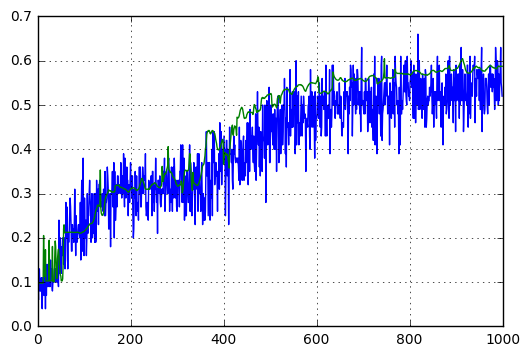

In [155]:
plt.plot(recorder_a_traindata)
plt.plot(recorder_a_testdata)
plt.grid()
plt.show()

WHAT ? WHY COST TRAINING IS SO LOW ?? that is the problem with me trying to debug 1 full hours. At first, I think the effect of sigmoid won't be so much but actuall the cost is quite high compare to other one.

### Relu > Sigmoid

At first, I will write about this after the drop-outs but I stuck there debugging for 1 full hour. Actuall sigmoid have one problem, vanishing gradient.If you look at the graph of sigmoid, the slope of the graph is near zero when we move forward more and this can be a problem. Let's see when we use Relu.

In [156]:
# try using Relu
pkeep = tf.placeholder(tf.float32)
# Output of input layer
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

# Output of hidden layer 1
Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

# Output of hidden layer 2
Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

# Ourput of hidden layer 3
Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

# Final layer 
Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=correct_label)
cross_entropy = tf.reduce_mean(cross_entropy)*100

train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(correct_label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Cost training:  230.243
Acuracy training:  0.07
Cost training:  102.098
Acuracy training:  0.63
Cost training:  75.5259
Acuracy training:  0.82
Cost training:  76.9063
Acuracy training:  0.75
Cost training:  56.3922
Acuracy training:  0.76
Cost training:  59.1287
Acuracy training:  0.8
Cost training:  41.2039
Acuracy training:  0.86
Cost training:  48.4496
Acuracy training:  0.86
Cost training:  49.84
Acuracy training:  0.86
Cost training:  28.3401
Acuracy training:  0.94


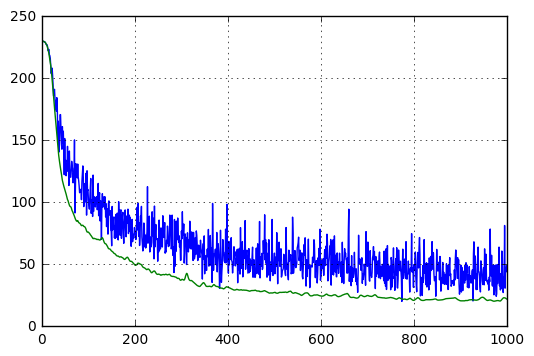

In [157]:
# Same code difference activation function

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

recorder_cost_traindata = []
recorder_cost_testdata = []

recorder_a_traindata = []
recorder_a_testdata = []

for i in range(1000):
    # We are going to feed the train image 100 at a time.
    batch_X_train, batch_Y_train = mnist.train.next_batch(100)
    
    # Make the learning rate decay exponentially 
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate_d = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
    
    # Have to add the learning rate becuase the variable in the test function is a placeholder
    train_data = {img_x: batch_X_train, correct_label: batch_Y_train, 
                  lr: learning_rate_d, pkeep:0.75}
    
    # No need to drop the neuron in testing
    test_data = {img_x: mnist.test.images, correct_label: mnist.test.labels, 
                 lr: learning_rate_d, pkeep:1}
    
    # Train the data
    sess.run(train_step, feed_dict=train_data)
    
    # Get the cost for both
    a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    # Pring every 100 times
    if i%100 == 0:
        print("Cost training: ", c)
        print("Acuracy training: ", a)
        
    # record the cost
    recorder_cost_traindata.append(c)
    recorder_cost_testdata.append(c_test)
    
    recorder_a_traindata.append(a)
    recorder_a_testdata.append(a_test)

# Print out the recorder
plt.plot(recorder_cost_traindata)
plt.plot(recorder_cost_testdata)
plt.grid()
plt.show()


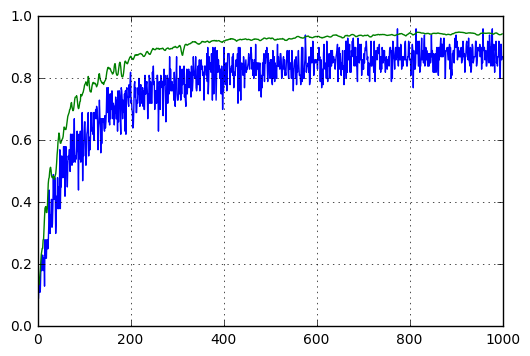

In [158]:
plt.plot(recorder_a_traindata)
plt.plot(recorder_a_testdata)
plt.grid()
plt.show()

There is more improvement.

### Let try to use our neural network

The network guess this picture to be: 8 with 72.1039% confident


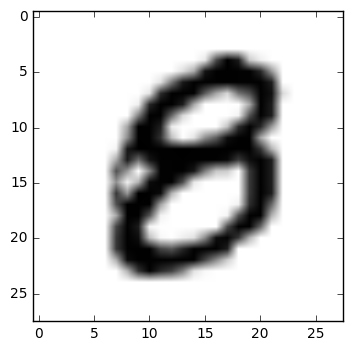

In [163]:
# I will randomly pick the image from testing set
import random
num = random.randint(0, mnist.test.images.shape[0])
img = mnist.test.images[num]

# Show the image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

# Run the image through Neural Network and get the class.
NN_result = sess.run(Y, feed_dict={img_x: [img], pkeep: 1})

# Get the class
img_class = np.argmax(NN_result, 1)
# # get the confident level
img_class_confident = NN_result[0][img_class] * 100

# Show the image
print("The network guess this picture to be: " + str(img_class[0]) + " with " + str(img_class_confident[0]) 
      + "% confident")

We are going to create method that will get the confident level of certain label.

In [164]:
def predict(img, label):
    # Feed the image to the neural network
    NN_result = sess.run(Y, feed_dict={img_x: [img], pkeep: 1})
    # get the confident level
    img_class_confident = NN_result[0][label] * 100
    
    return img_class_confident

# Fooling the neural network using GA (https://arxiv.org/abs/1412.1897)

What we are going to do is to use GA to find the image that have more than 99% confident. This is like a reverse engineer the neural network. We are , first, going to create the random image.

## Random the image

0.0319975864841


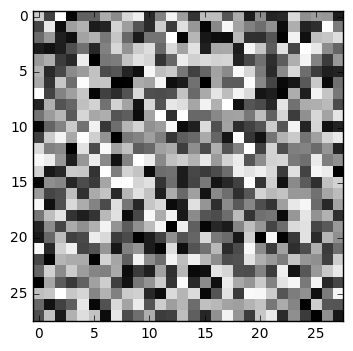

In [166]:
# The size of MNIST is 28 by 28
random_img = np.random.random((28,28))
plt.imshow(random_img, cmap='gray', interpolation='nearest')

# Use predict method to get the confident level.
print(predict(random_img.reshape((28,28,1)), 0))

Now we know that the network won't predict this as a number.

## Process GA

There are 3 main method for GA: Crossover, Mutate, Calculate fitneee

### Crossover
We will do the same as section 4. 
- Get the first half from the first parent
- Get the second half from the second parent
- Adding together

Let's look at code.

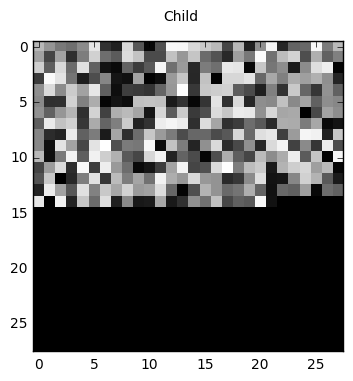

In [167]:
# This algorith is inspired by http://stackoverflow.com/questions/41193360/crossover-two-numpy-arrays-efficiently
dad = np.random.random((28,28))
mom = np.zeros((28,28))
# The zeros metrix will be all dark, so we can see the crossover in action.

# Since the image will be 28 by 28 the random range will be 0 to 28^2 or 784.
divide_range = random.randint(0, 28**2)

tmp = dad.flat[divide_range:].copy()
mom = mom.flat

dad.flat[divide_range:], mom[divide_range:] = mom[:divide_range], tmp
child = dad

plt.suptitle("Child")
plt.imshow(child, cmap='gray', interpolation='nearest')


### Mutation

- We will first store the matrix in a list using np.nditer.
- We will perform the mutation just like the section 4.
 - rolling a dice and change the value randomly.
- We will reshape the list to make it an image.

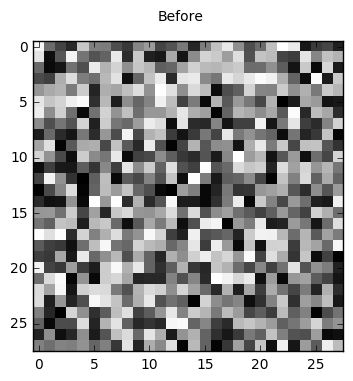

In [168]:
# Sample gene
mutate_gene = np.random.random((28,28))

plt.suptitle("Before")
plt.imshow(mutate_gene, cmap='gray', interpolation='nearest')

# Save the matrix in list.
img_list = []
for i in np.nditer(mutate_gene):
    img_list.append(i)
    
# Mutated gene list.
a = []
for i in img_list:
    # mutation rate is 0.1, so you can see the difference
    if random.random() < 0.1:
        a.append(random.random())
    else:
        a.append(i)
# It should be (28,28,1) because it can go through the network but we need shape of (28,28) to show the image.
new_gene = np.array(a).reshape((28,28,1))

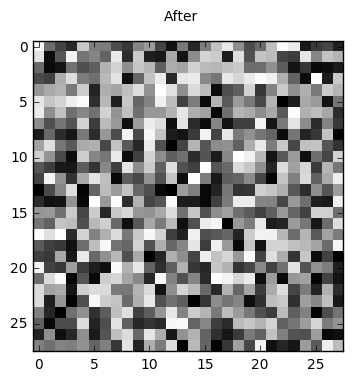

In [169]:
plt.suptitle("After")
plt.imshow(new_gene.reshape((28,28)), cmap='gray', interpolation='nearest')

The last function is calculate fitness. 

We will use the confidential level as fitness.

## Before we start !!

The neural network input must have a shape of (28,28,1), but in order to display image we need (28,28) matrix. We have to reshape it.

In [170]:
# The target number we want to get th highest confidential level
target_number = 0

# Same as section 4.
pop_size = 100
mutation_Rate = 0.01
tournament_rounds = 6

In [171]:
class Genome(object):
    def __init__(self, gene):
        self.fitness = 0
        self.gene = gene

    @classmethod
    def random_gene(cls):
        a = []
        for i in range(28**2):
            a.append(random.random())
        return cls(np.array(a).reshape((28,28,1)))

    def calculate_fitness(self):
        self.fitness = predict(self.gene, target_number)

    def crossover(self, a):
        # http://stackoverflow.com/questions/41193360/crossover-two-numpy-arrays-efficiently
        x = random.randint(0, 28**2)
        Z = self.gene

        tmp = Z.flat[:x].copy()
        mom = a.gene.flat
        Z.flat[:x], mom[:x] = mom[:x], tmp

        return Genome(Z.reshape((28,28,1)))

    def mutate(self, rate):
        l = [x for x in np.nditer(self.gene)]
        a = []
        for i in l:
            if random.random() < rate:
                a.append(random.random())
            else:
                a.append(i)
        self.gene = np.array(a).reshape((28,28,1))

    def gene_to_img(self):
        img = self.gene.reshape((28,28))
        plt.imshow(img, cmap='gray', interpolation='nearest')

        
def select(l):
    a = [random.choice(l) for _ in range(tournament_rounds)]
    a = max(a, key=lambda m: m.fitness)
    return a


Best in this generation fitness  : 0.677986769006
Best in this generation fitness  : 85.9856247902
Best in this generation fitness  : 97.8483438492
Best in this generation fitness  : 99.8042345047
Best in this generation fitness  : 99.9753654003
Best in this generation fitness  : 99.9978780746
Best in this generation fitness  : 99.9994039536
Best in this generation fitness  : 99.9998092651
Best in this generation fitness  : 99.9999403954
Best in this generation fitness  : 99.9999761581
Best in this generation fitness  : 99.9999880791
Best in this generation fitness  : 99.9999880791
Best in this generation fitness  : 100.0
Best in this generation fitness  : 99.9999880791
Best in this generation fitness  : 100.0
Best in this generation fitness  : 99.9999880791
Best in this generation fitness  : 100.0
Best in this generation fitness  : 99.9999880791
Best in this generation fitness  : 100.0
Best in this generation fitness  : 100.0


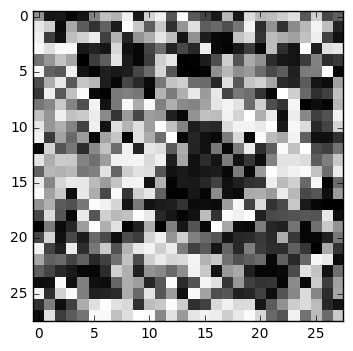

In [172]:
pop = []

for i in range(pop_size):
    pop.append(Genome.random_gene())

best_in_gen = pop[0]

# best_in_gen.gene_to_img()
# best_in_gen.calculate_fitness()
# print(best_in_gen.fitness)

for i in range(200):
    for j in pop:
        j.calculate_fitness()

    n_gen = []

    pop.sort(key = lambda m: -m.fitness)

    best_in_gen = pop[0]
    if i%10 == 0:
        print("Best in this generation fitness  : " + str(best_in_gen.fitness))
    # best_in_gen.gene_to_img()

    n_gen.append(pop[0])

    for i in range(pop_size - 1):
        # Select parents
        a = select(pop)
        b = select(pop)

        # Make them mate
        child = a.crossover(b)

        # Child may be mutated
        child.mutate(mutation_Rate)

        # Then we add to the next generation population.
        n_gen.append(child)

    pop = n_gen
    
best_in_gen.gene_to_img()

In [173]:
predict(best_in_gen.gene, 0)

100.0

Seem random to us but 100% sure for computer.